In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

%matplotlib inline

PI simulation on first order system
===

In [21]:
F = 1
m = 1
rho = 1
A = 1
Cd = 1

coeff1 = F/m
coeff2 = 0.5*rho*A*(Cd/m)


def dvcap_dt(vcap, t, params):
    Kp, Ki, v_target = params["PID"]
    coeff1, coeff2 = params["Model"]

    u, v = vcap
    dv_dt = coeff1*u - coeff2*(v**2)
    du_dt = Kp*(-dv_dt) + Ki*(v_target - v)
    
    return [du_dt, dv_dt]

In [43]:
Kp = 10
Ki = 10
v_target = 20

params = {
    "PID": (Kp, Ki, v_target),
    "Model": (coeff1, coeff2)
}

t = np.linspace(0, 30, 1000)
res = odeint(dvcap_dt, [0, 0], t, args=(params, ))
u, v = res[:, 0], res[:, 1]

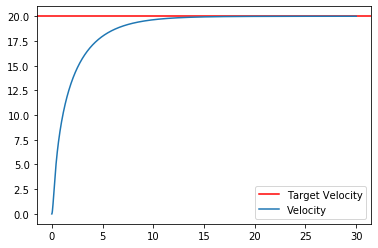

In [44]:
plt.axhline(y=v_target, color='r', label="Target Velocity")
plt.plot(t, v, label="Velocity")
plt.legend()

PID simulation on second order system
===

Plant model equations
---

We require a function that given a tuple $ x = (y, \frac{dy}{dt} ) $ and $ t $
will return $ [ \frac{dy}{dt}, \frac{d^2y}{dt^2} ] $

This is a dynamic specific to the model of the given plant

In [45]:
def dycap_dt(x, t):
    kp = 2.0
    tau = 3.0
    zeta = 0.05
    dx = 10.0

    y, dy_dt = x
    d2y_dt2 = (-2.0*zeta*tau*dy_dt - y + kp*dx)/tau**2

    return [dy_dt, d2y_dt2]

Controller equations
---

In [ ]:
class SecondOrderPIDController:
    def __init__(Ki, Kp, Kd, plant_model):
        self.params = Ki, Kp, Kd
        self.model = plant_model

    def get_du_dt(self, ):
        """
            Expects plant_model to be a function like dycap_dt above.
        """
        